In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shill_bidding_data = pd.read_csv('/Users/eupirate/Desktop/CCT/CA1 ML 五月/Shill Bidding Dataset.csv')
shill_bidding_data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [3]:
missing_values = shill_bidding_data.isnull().sum()
missing_values

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [4]:
### There is no missing data in shill_bidding_data.csv. THis will make our data processing simple.
### Next we can go ahead to detech and handling outliers. We will identify outliers in the numerical columns only by using box plots.

/Users/eupirate/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/eupirate/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/eupirate/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/eupirate/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


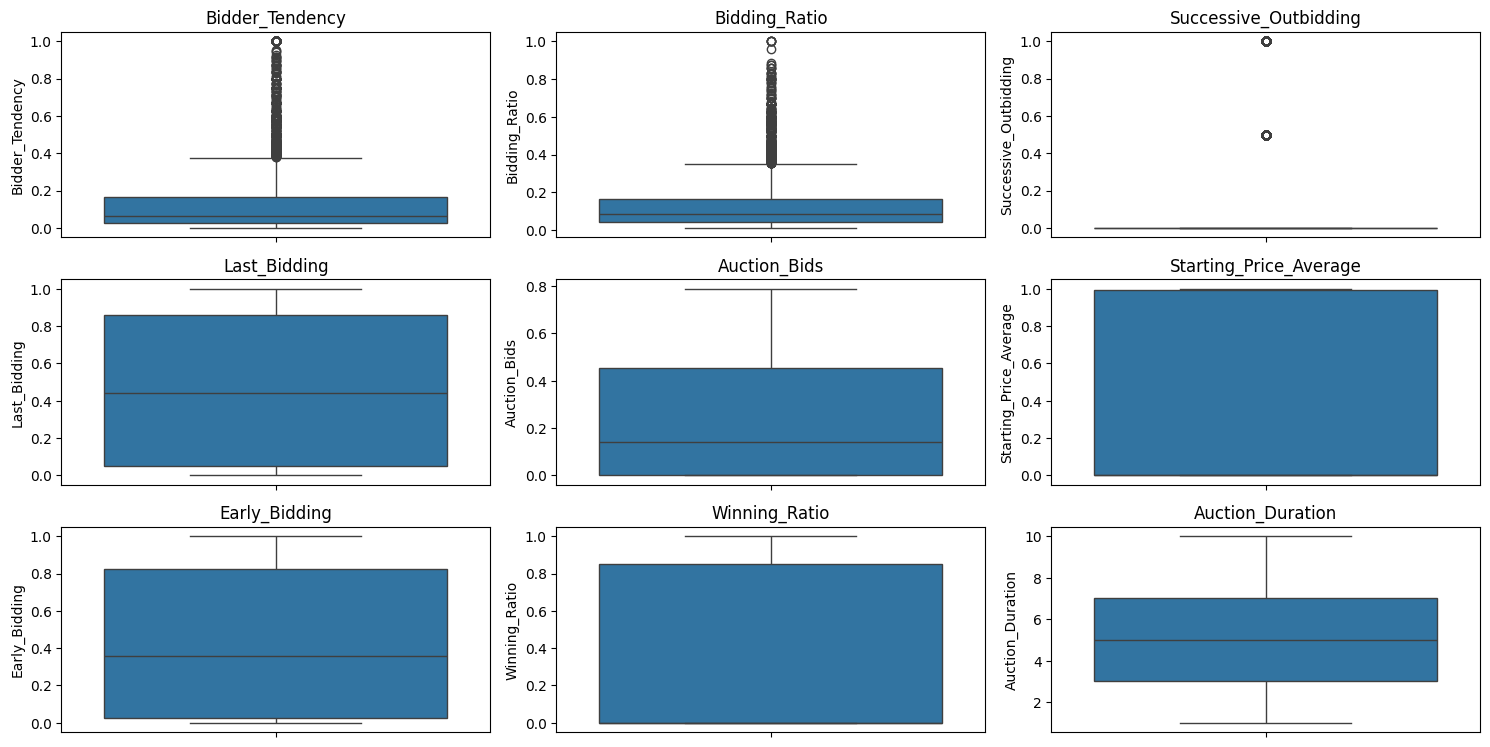

          Record_ID   Auction_ID  Bidder_Tendency  Bidding_Ratio  \
count   6321.000000  6321.000000      6321.000000    6321.000000   
mean    7535.829457  1241.388230         0.142541       0.127670   
std     4364.759137   735.770789         0.197084       0.131530   
min        1.000000     5.000000         0.000000       0.011765   
25%     3778.000000   589.000000         0.027027       0.043478   
50%     7591.000000  1246.000000         0.062500       0.083333   
75%    11277.000000  1867.000000         0.166667       0.166667   
max    15144.000000  2538.000000         1.000000       1.000000   

       Successive_Outbidding  Last_Bidding  Auction_Bids  \
count            6321.000000   6321.000000   6321.000000   
mean                0.103781      0.463119      0.231606   
std                 0.279698      0.380097      0.255252   
min                 0.000000      0.000000      0.000000   
25%                 0.000000      0.047928      0.000000   
50%                 0.00000

In [5]:
# describe statistical summary
stat_summary = shill_bidding_data.describe()

# exclude Record_ID, Auction_ID, Bidder_ID, Class
numerical_columns = shill_bidding_data.columns[3:-1] 

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=shill_bidding_data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# print statistical summary
print(stat_summary)

In [6]:
### we can see the potential outliers in Bidder_Tendency, Bidding_Ratio and Successive_Outbidding columns. Particulary those with high standard deviations and with a large range between min and max values.
### with those detected outliers. can can cap those outliers by applying the interquartile range method (IQR), we can create Q1 with quantile(0.25), Q3 with quantile(0.75). We use Q3 - Q1 to work out the IQR. With that we'll calculate the IQR for each column and cap the outliers to 1.5*IQR range.

In [7]:
# create a function to cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

# apply the function to all numerical columns
for column in numerical_columns:
    shill_bidding_data = cap_outliers(shill_bidding_data, column)

### and then normalize numerical data fbetween 0 and 1 or better comparison.
# normalize numerical columns
normalized_data = shill_bidding_data.copy()
for column in numerical_columns:
    normalized_data[column] = (shill_bidding_data[column] - shill_bidding_data[column].min()) / (shill_bidding_data[column].max() - shill_bidding_data[column].min())

# display the normalized data to verify
normalized_data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.531737,1.000000,NaN,0.000028,0.0,0.993657,0.000028,0.666667,0.444444,0
1,2,732,g***r,0.064846,0.554147,NaN,0.013124,0.0,0.993657,0.013124,0.944444,0.444444,0
2,3,732,t***p,0.379812,0.554147,NaN,0.003042,0.0,0.993657,0.003042,1.000000,0.444444,0
3,4,732,7***n,0.265868,0.554147,NaN,0.097487,0.0,0.993657,0.097487,1.000000,0.444444,0
4,5,900,z***z,0.136343,0.619567,NaN,0.001318,0.0,0.000000,0.001242,0.500000,0.666667,0


In [8]:
### create function to plot histogram with mean and median lines. by adding mean and median lines helps to quickly identify central tendency, skewness and variablity. 
def plot_histogram_with_mean_median(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    mean_value = df[column].mean()
    median_value = df[column].median()
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

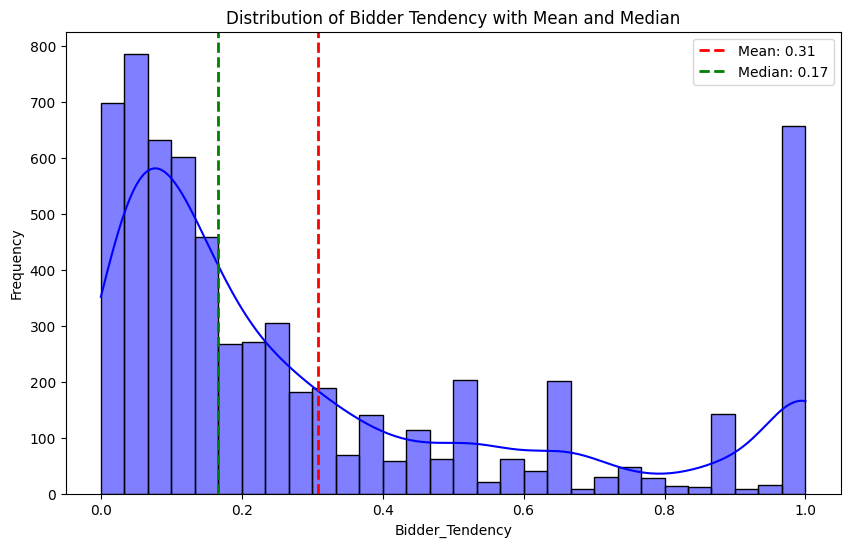

In [9]:
### plotting for Bidder Tendency
plot_histogram_with_mean_median(normalized_data, 'Bidder_Tendency', 'Distribution of Bidder Tendency with Mean and Median')
##

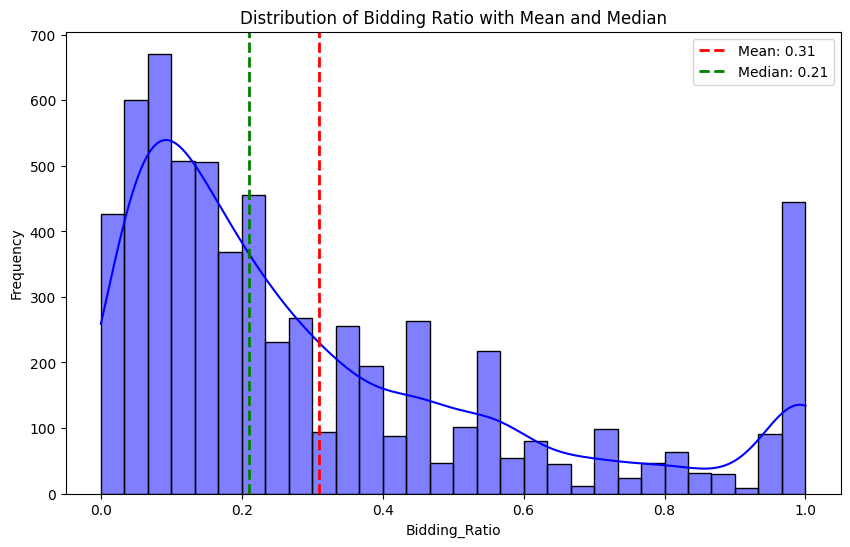

In [10]:
# plotting for Bidding Ratio
plot_histogram_with_mean_median(normalized_data, 'Bidding_Ratio', 'Distribution of Bidding Ratio with Mean and Median')


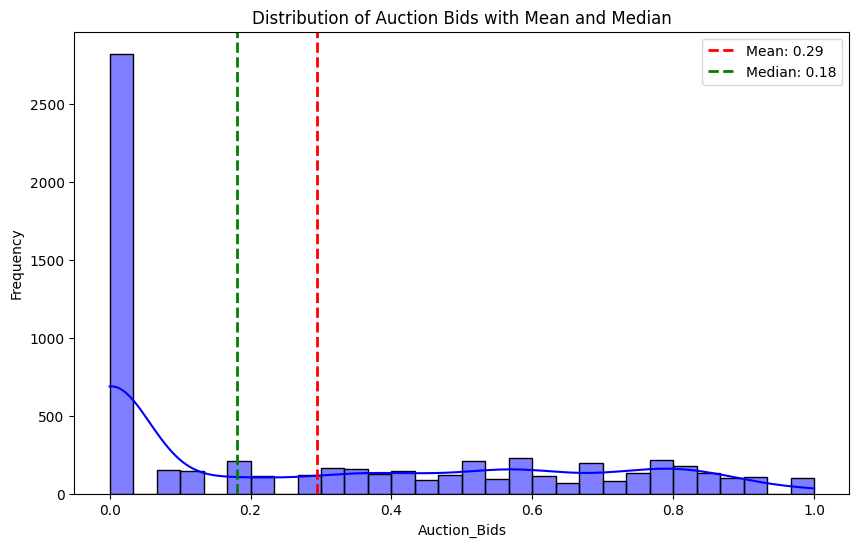

In [11]:
# plotting for Auction Bids
plot_histogram_with_mean_median(normalized_data, 'Auction_Bids', 'Distribution of Auction Bids with Mean and Median')
